📁 Embeddings already extracted at: /content/latent_embeddings
✅ Loaded label data with 126 entries
✅ Matched 921 labeled embeddings for binary classification

✅ Classification Report (Balanced Random Forest Model):

              precision    recall  f1-score   support

     Healthy       0.14      0.43      0.21         7
   Unhealthy       0.98      0.90      0.94       178

    accuracy                           0.88       185
   macro avg       0.56      0.66      0.57       185
weighted avg       0.94      0.88      0.91       185



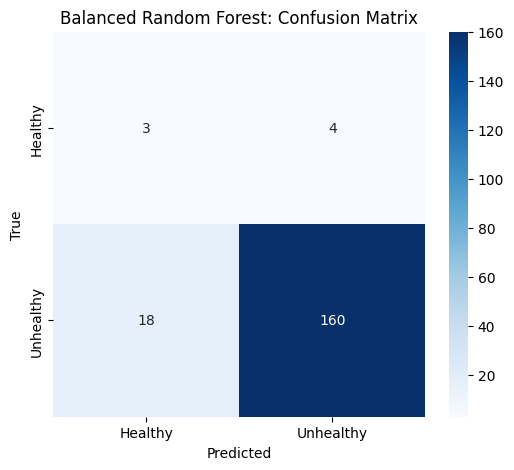

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
from PIL import Image
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

zip_path = '/content/latent_embeddings.zip'
extract_to = '/content/latent_embeddings'

if not os.path.exists(extract_to):
    os.makedirs(extract_to, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Extracted embeddings to: {extract_to}")
else:
    print(f"📁 Embeddings already extracted at: {extract_to}")

labels_df = pd.read_csv('/content/patient_diagnosis.csv')
labels_df['patient_ID'] = labels_df['patient_ID'].astype(str).str.strip().str.lstrip("0")
pid_to_disease = dict(zip(labels_df['patient_ID'], labels_df['Disease']))
print(f"✅ Loaded label data with {len(labels_df)} entries")


X_labeled = []
y_labeled = []

for root, _, files in os.walk(extract_to):
    for file in files:
        if file.lower().endswith('.png'):
            file_path = os.path.join(root, file)

            if "embedding_RP_" in file:
                pid = file.split("_")[2].lstrip("0")
            elif "embedding_" in file:
                pid = file.split("_")[1].lstrip("0")
            else:
                print(f"❌ Unrecognized format: {file}")
                continue

            disease = pid_to_disease.get(pid)

            if disease is not None:
                img = Image.open(file_path).convert('L')
                img_resized = img.resize((14, 14))
                img_array = np.array(img_resized).flatten() / 255.0

                if disease == "Healthy":
                    X_labeled.append(img_array)
                    y_labeled.append("Healthy")
                else:
                    X_labeled.append(img_array)
                    y_labeled.append("Unhealthy")
            else:
                print(f"⚠️ Warning: No label found for patient ID {pid}, skipping this image.")

print(f"✅ Matched {len(X_labeled)} labeled embeddings for binary classification")

le = LabelEncoder()
y_encoded = le.fit_transform(y_labeled)
X_labeled = np.array(X_labeled)

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\n✅ Classification Report (Balanced Random Forest Model):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Balanced Random Forest: Confusion Matrix")
plt.savefig('brf_confusion_matrix.png')

📁 Embeddings already extracted at: /content/latent_embeddings
✅ Loaded label data with 126 entries
✅ Matched 921 labeled embeddings for binary classification

✅ Classification Report (SVC Model):

              precision    recall  f1-score   support

     Healthy       0.17      0.43      0.24         7
   Unhealthy       0.98      0.92      0.94       178

    accuracy                           0.90       185
   macro avg       0.57      0.67      0.59       185
weighted avg       0.95      0.90      0.92       185



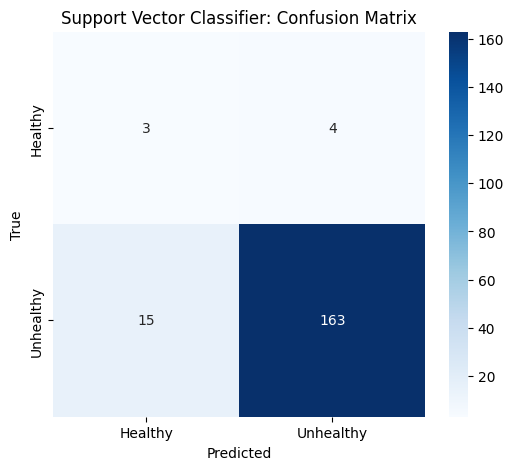

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

zip_path = '/content/latent_embeddings.zip'
extract_to = '/content/latent_embeddings'

if not os.path.exists(extract_to):
    os.makedirs(extract_to, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Extracted embeddings to: {extract_to}")
else:
    print(f"📁 Embeddings already extracted at: {extract_to}")

labels_df = pd.read_csv('/content/patient_diagnosis.csv')
labels_df['patient_ID'] = labels_df['patient_ID'].astype(str).str.strip().str.lstrip("0")
pid_to_disease = dict(zip(labels_df['patient_ID'], labels_df['Disease']))
print(f"✅ Loaded label data with {len(labels_df)} entries")

X_labeled = []
y_labeled = []

for root, _, files in os.walk(extract_to):
    for file in files:
        if file.lower().endswith('.png'):
            file_path = os.path.join(root, file)


            if "embedding_RP_" in file:
                pid = file.split("_")[2].lstrip("0")
            elif "embedding_" in file:
                pid = file.split("_")[1].lstrip("0")
            else:
                print(f"❌ Unrecognized format: {file}")
                continue

            disease = pid_to_disease.get(pid)

            if disease is not None:
                img = Image.open(file_path).convert('L')
                img_resized = img.resize((14, 14))
                img_array = np.array(img_resized).flatten() / 255.0

                if disease == "Healthy":
                    X_labeled.append(img_array)
                    y_labeled.append("Healthy")
                else:
                    X_labeled.append(img_array)
                    y_labeled.append("Unhealthy")
            else:
                print(f"⚠️ Warning: No label found for patient ID {pid}, skipping this image.")

print(f"✅ Matched {len(X_labeled)} labeled embeddings for binary classification")

le = LabelEncoder()
y_encoded = le.fit_transform(y_labeled)
X_labeled = np.array(X_labeled)

scaler = StandardScaler()
X_labeled = scaler.fit_transform(X_labeled)

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\n✅ Classification Report (SVC Model):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Support Vector Classifier: Confusion Matrix")
plt.savefig('svc_confusion_matrix.png')

📁 Embeddings already extracted at: /content/latent_embeddings
✅ Loaded label data with 126 entries
✅ Matched 921 labeled embeddings for binary classification

✅ Classification Report (KNN Model):

              precision    recall  f1-score   support

     Healthy       1.00      0.14      0.25         7
   Unhealthy       0.97      1.00      0.98       178

    accuracy                           0.97       185
   macro avg       0.98      0.57      0.62       185
weighted avg       0.97      0.97      0.96       185



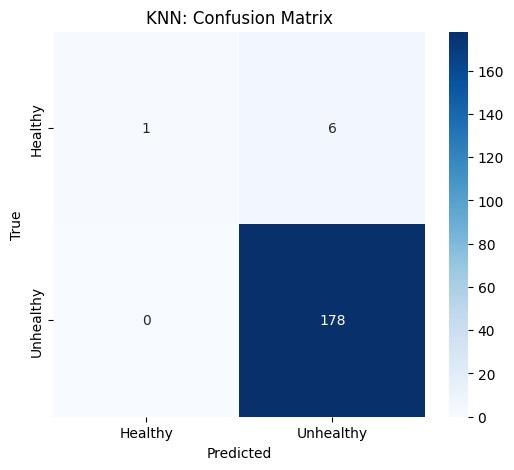

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

zip_path = '/content/latent_embeddings.zip'
extract_to = '/content/latent_embeddings'

if not os.path.exists(extract_to):
    os.makedirs(extract_to, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Extracted embeddings to: {extract_to}")
else:
    print(f"📁 Embeddings already extracted at: {extract_to}")

labels_df = pd.read_csv('/content/patient_diagnosis.csv')
labels_df['patient_ID'] = labels_df['patient_ID'].astype(str).str.strip().str.lstrip("0")
pid_to_disease = dict(zip(labels_df['patient_ID'], labels_df['Disease']))
print(f"✅ Loaded label data with {len(labels_df)} entries")


X_labeled = []
y_labeled = []

for root, _, files in os.walk(extract_to):
    for file in files:
        if file.lower().endswith('.png'):
            file_path = os.path.join(root, file)

            if "embedding_RP_" in file:
                pid = file.split("_")[2].lstrip("0")
            elif "embedding_" in file:
                pid = file.split("_")[1].lstrip("0")
            else:
                print(f"❌ Unrecognized format: {file}")
                continue


            disease = pid_to_disease.get(pid)

            if disease is not None:
                img = Image.open(file_path).convert('L')
                img_resized = img.resize((14, 14))
                img_array = np.array(img_resized).flatten() / 255.0


                if disease == "Healthy":
                    X_labeled.append(img_array)
                    y_labeled.append("Healthy")
                else:
                    X_labeled.append(img_array)
                    y_labeled.append("Unhealthy")
            else:
                print(f"⚠️ Warning: No label found for patient ID {pid}, skipping this image.")

print(f"✅ Matched {len(X_labeled)} labeled embeddings for binary classification")

le = LabelEncoder()
y_encoded = le.fit_transform(y_labeled)
X_labeled = np.array(X_labeled)

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\n✅ Classification Report (KNN Model):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN: Confusion Matrix")
plt.savefig('knn_confusion_matrix.png')
plt.show()